In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
divorce = pd.read_csv('../data/divorce.csv',sep = ';')
divorce.head()

Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0     2     2     4     1     0     0     0     0     0      0  ...      2   
1     4     4     4     4     4     0     0     4     4      4  ...      2   
2     2     2     2     2     1     3     2     1     1      2  ...      3   
3     3     2     3     2     3     3     3     3     3      3  ...      2   
4     2     2     1     1     1     1     0     0     0      0  ...      2   

   Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  Class  
0      1      3      3      3      2      3      2      1      1  
1      2      3      4      4      4      4      2      2      1  
2      2      3      1      1      1      2      2      2      1  
3      2      3      3      3      3      2      2      2      1  
4      1      2      3      2      2      2      1      0      1  

[5 rows x 55 columns]

In [33]:
print(divorce.shape)
print(divorce.Class.value_counts())
for u in divorce.columns:
    print (divorce[u].value_counts())

(170, 55)
0    86
1    84
Name: Class, dtype: int64
0    69
3    47
4    31
2    14
1     9
Name: Atr1, dtype: int64
0    59
3    38
2    28
1    23
4    22
Name: Atr2, dtype: int64
3    52
0    51
2    26
1    24
4    17
Name: Atr3, dtype: int64
0    75
3    32
2    30
4    21
1    12
Name: Atr4, dtype: int64
0    82
3    44
4    26
1    10
2     8
Name: Atr5, dtype: int64
0    86
1    49
2    29
3     4
4     2
Name: Atr6, dtype: int64
0    114
1     42
4      5
2      5
3      4
Name: Atr7, dtype: int64
0    81
3    37
4    21
2    21
1    10
Name: Atr8, dtype: int64
0    84
3    49
4    17
2    13
1     7
Name: Atr9, dtype: int64
0    62
2    38
3    34
4    18
1    18
Name: Atr10, dtype: int64
0    71
3    44
4    32
1    19
2     4
Name: Atr11, dtype: int64
0    58
3    42
1    27
2    22
4    21
Name: Atr12, dtype: int64
0    47
3    45
1    33
4    27
2    18
Name: Atr13, dtype: int64
0    66
3    38
1    23
4    22
2    21
Name: Atr14, dtype: int64
0    69
3    51
1    20
4   

In [44]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

y=divorce.Class
X=divorce.drop(columns=['Class'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

knnc=KNNC(n_neighbors=3)
knnc.fit(X_train, y_train)
y_pred=knnc.predict(X_test)


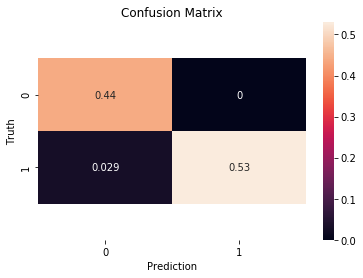

In [45]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

In [46]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score

print(acc(y_test, y_pred))


roc_auc_score(y_test,y_pred)


0.9705882352941176


0.9736842105263157

In [47]:
from sklearn.svm import SVC

svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[::, -1]

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [48]:
X_test.iloc[3].sum()

24

In [49]:
list(y_prob)

[0.14925685471837633,
 0.9973944697847416,
 0.9922877606074524,
 0.011799820774380286,
 0.9923484381648217,
 0.030479921678345095,
 0.00968449855841016,
 0.96714907819024,
 0.027796579312999867,
 0.9923475017257594,
 0.029443354728339005,
 0.03957531027429825,
 0.012654557652760298,
 0.9948932628157559,
 0.012287188427442518,
 0.9964121977993858,
 0.014476205671844617,
 0.15246827972807991,
 0.9958772446801751,
 0.013037815798574047,
 0.9958071279759546,
 0.11386452700773105,
 0.9922877606074524,
 0.997372980320477,
 0.9966875936708885,
 0.01377440849263912,
 0.9923484381648217,
 0.9999858633142374,
 0.014389978397560205,
 0.01005754837258754,
 0.9856357666911502,
 0.9564446938736253,
 0.9413252275601074,
 0.9422996183221137]

In [50]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

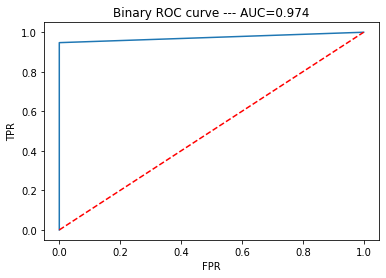

In [51]:
fpr, tpr, umbrales = roc(y_test, y_pred)
a=auc(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC curve --- AUC={:.3f}'.format(a))
plt.show();

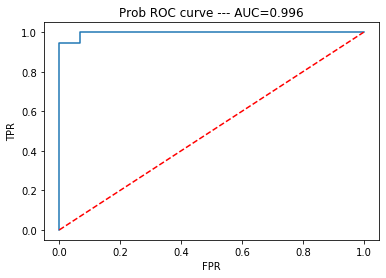

In [52]:
fpr2, tpr2, umbrales2 = roc(y_test, y_prob)
a2=auc(y_test, y_prob)
plt.plot(fpr2, tpr2)
plt.plot(fpr2, fpr2, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Prob ROC curve --- AUC={:.3f}'.format(a2))
plt.show();

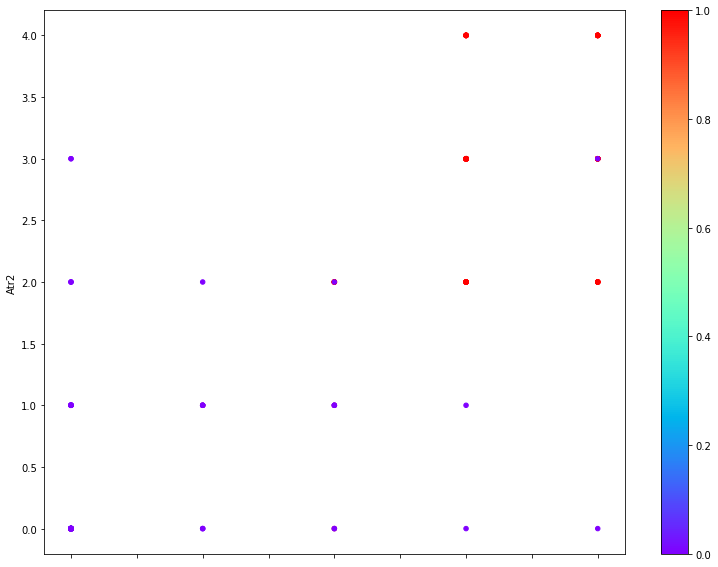

In [13]:
divorce.plot.scatter(x='Atr1', y='Atr2',c=divorce.Class ,cmap='rainbow',figsize=(13,10));

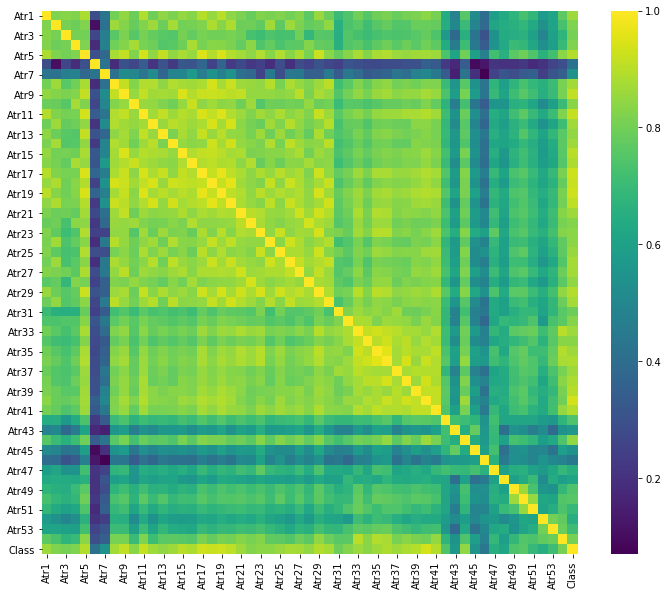

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(divorce.corr(), cmap='viridis');

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC
X_train1, X_test1, y_train1, y_test1=train_test_split(X, y, test_size=0.2)

rf=RFC()
rf.fit(X_train1, y_train1)
y_pred1=rf.predict(X_test1)

feats = {}
for feature, importance in zip(X_train1.columns, rf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient="index").rename(
    columns={0: "importance"})

imp = importances.sort_values(by="importance", ascending=False)
print(acc(y_test1, y_pred1))
print(auc(y_test1,y_pred1))
print(imp)
rf.feature_importances_

0.9705882352941176
0.9666666666666667
       importance
Atr9     0.371991
Atr17    0.183089
Atr26    0.105336
Atr19    0.104584
Atr11    0.102210
Atr18    0.101134
Atr25    0.012489
Atr27    0.005446
Atr40    0.005386
Atr44    0.004416
Atr31    0.002206
Atr10    0.000693
Atr12    0.000693
Atr50    0.000326
Atr38    0.000000
Atr37    0.000000
Atr42    0.000000
Atr36    0.000000
Atr39    0.000000
Atr41    0.000000
Atr1     0.000000
Atr43    0.000000
Atr34    0.000000
Atr45    0.000000
Atr46    0.000000
Atr47    0.000000
Atr48    0.000000
Atr49    0.000000
Atr51    0.000000
Atr52    0.000000
Atr53    0.000000
Atr35    0.000000
Atr28    0.000000
Atr33    0.000000
Atr15    0.000000
Atr3     0.000000
Atr4     0.000000
Atr5     0.000000
Atr6     0.000000
Atr7     0.000000
Atr8     0.000000
Atr13    0.000000
Atr14    0.000000
Atr16    0.000000
Atr32    0.000000
Atr20    0.000000
Atr21    0.000000
Atr22    0.000000
Atr23    0.000000
Atr24    0.000000
Atr2     0.000000
Atr29    0.000000
Atr30   

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.71990777e-01, 6.93427274e-04, 1.02210071e-01, 6.92668372e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.83089093e-01, 1.01133804e-01, 1.04584086e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.24893320e-02, 1.05336362e-01, 5.44622426e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.20588235e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.38641758e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.41558442e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.26271499e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [16]:
corre=divorce.corr()

In [17]:
corre.Class.sort_values(ascending=False)

Class    1.000000
Atr40    0.938684
Atr17    0.929346
Atr19    0.928627
Atr18    0.923208
Atr11    0.918386
Atr9     0.912368
Atr20    0.907008
Atr15    0.901220
Atr39    0.896180
Atr41    0.894356
Atr5     0.893180
Atr29    0.892954
Atr36    0.886497
Atr16    0.886260
Atr38    0.883311
Atr30    0.874531
Atr26    0.872868
Atr27    0.869788
Atr8     0.869569
Atr12    0.868983
Atr21    0.864519
Atr14    0.864316
Atr37    0.863597
Atr35    0.862624
Atr33    0.861328
Atr1     0.861324
Atr25    0.857052
Atr44    0.847336
Atr28    0.846606
Atr13    0.844743
Atr24    0.839392
Atr23    0.837504
Atr34    0.835167
Atr10    0.834897
Atr32    0.829056
Atr22    0.825938
Atr2     0.820774
Atr4     0.819583
Atr54    0.806765
Atr3     0.806709
Atr31    0.792607
Atr50    0.755248
Atr49    0.740704
Atr42    0.739629
Atr53    0.711176
Atr51    0.692681
Atr47    0.656409
Atr52    0.651478
Atr48    0.619830
Atr43    0.566242
Atr45    0.546450
Atr7     0.544835
Atr46    0.443465
Atr6     0.420913
Name: Clas

In [18]:
#Checar como funcionan
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Precision:', precision_score(y_train, rf.predict(X_train)))
print('Recall:', recall_score(y_train, rf.predict(X_train)))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('Precision:', precision_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))

Training set metrics:
Accuracy: 0.9852941176470589
Precision: 1.0
Recall: 0.967741935483871
Test set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [19]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='cols', y='imps')

In [25]:
import progressbar as progressbar
import random2 as random

In [26]:

def PermImportance(X, y, clf, metric, num_iterations=100):
    '''
    Calculates the permutation importance of features in a dataset.
    Inputs:
    X: dataframe with all the features
    y: array-like sequence of labels
    clf: sklearn classifier, already trained on training data
    metric: sklearn metric, such as accuracy_score, precision_score or recall_score
    num_iterations: no. of repetitive runs of the permutation
    Outputs:
    baseline: the baseline metric without any of the columns permutated
    scores: differences in baseline metric caused by permutation of each feature, dict in the format {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(max_value=len(X.columns))
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [30]:
y=divorce.Class
X=divorce.drop(columns=['Class'])
PermImportance(X,y,knnc,recall_score,100)

 98% (53 of 54) |####################### | Elapsed Time: 0:00:39 ETA:   0:00:00

(0.9523809523809523,
 {'Atr1': [0.0,
   0.0,
   0.0,
   0.0,
   -0.023809523809523836,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   0.0,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.023809523809523836,
   -0.011904761904761973,
   0.0,
   0.0,
   -0.023809523809523836,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   0.0,
   0.0,
   -0.011904761904761973,
   -0.023809523809523836,
   0.0,
   0.0,
   -0.011904761904761973,
   -0.023809523809523836,
   -0.011904761904761973,
   0.0,
   0.0,
   0.0,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   0.0,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   -0.011904761904761973,
   0.0,
   -0.011904761904761973,
   0.0,
   0.0,
   -0.011904761904761